# Project 2

# A. Classification Modelling Requirement

## 1. Title, Name and References

Nhi Cao - 300 367 933

Amrit Sian - 300 340 252

Huy Thuy Dung Nguyen - 300 363 745

## 2. Library import and data loading

In [1]:
import pandas as pd
import numpy as np

#read the CSV file into the DataFrame 'df'
df = pd.read_csv('bank-sampled-9K.csv')

#glimpse of data
df

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
2,11,29,admin.,single,secondary,no,390,yes,no,unknown,5,may,137,1,-1,0,unknown,no
3,12,53,technician,married,secondary,no,6,yes,no,unknown,5,may,517,1,-1,0,unknown,no
4,17,57,blue-collar,married,primary,no,52,yes,no,unknown,5,may,38,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
8996,45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
8997,45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
8998,45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes


## 3. Data Analysis, Preparation and Wrangling

In [2]:
#drop duration as suggested by the documentation
df.drop(columns=['duration'], axis=1, inplace=True)

#convert the two-column time to a column containing the number of days till the last day of campaign
from datetime import datetime as dt

last_date = "18 Nov, 2010" #assume the analysis date
dt_1 = dt.strptime(last_date, "%d %b, %Y") #change it to datetime

#the month needs to start with a capital letter
df['month'] = df['month'].apply(lambda x: x.capitalize())
df['date'] = df['day'].astype(str)+ " " + df['month'] + ", 2010"

#calculate the duration between the two dates
df['last_contact'] = df['date'].apply(lambda x: (dt_1 - dt.strptime(x, "%d %b, %Y")).days)

df.drop(columns={'day', 'date', 'month'}, axis=1, inplace=True)

df_p = df.copy()


In [3]:
df.describe()

,Unnamed: 0,age,balance,campaign,pdays,previous,last_contact
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,22552.799889,41.035667,1372.970222,2.767667,39.906444,0.609556,150.289000
std,13076.016479,10.561698,3363.690197,3.011022,99.440498,3.499115,74.721977
min,0.000000,18.000000,-4057.000000,1.000000,-1.000000,0.000000,-42.000000
25%,11247.000000,33.000000,68.000000,1.000000,-1.000000,0.000000,104.000000
50%,22556.000000,39.000000,450.000000,2.000000,-1.000000,0.000000,166.000000
75%,33941.250000,48.000000,1453.250000,3.000000,-1.000000,0.000000,193.000000
max,45207.000000,90.000000,102127.000000,51.000000,831.000000,275.000000,316.000000


In [4]:
df.corr()

C:\Users\Trang Ton Nguyen\AppData\Local\Temp\ipykernel_9064\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,age,balance,campaign,pdays,previous,last_contact
Unnamed: 0,1.000000,0.015766,0.079611,-0.104280,0.434885,0.181952,-0.024466
age,0.015766,1.000000,0.098484,0.020314,-0.016667,-0.008346,-0.096214
balance,0.079611,0.098484,1.000000,-0.015501,0.006792,0.007992,-0.100777
campaign,-0.104280,0.020314,-0.015501,1.000000,-0.092656,-0.026963,-0.071510
pdays,0.434885,-0.016667,0.006792,-0.092656,1.000000,0.329919,0.109754
previous,0.181952,-0.008346,0.007992,-0.026963,0.329919,1.000000,0.042750
last_contact,-0.024466,-0.096214,-0.100777,-0.071510,0.109754,0.042750,1.000000


In [5]:
#check details of columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    9000 non-null   int64 
 1   age           9000 non-null   int64 
 2   job           9000 non-null   object
 3   marital       9000 non-null   object
 4   education     9000 non-null   object
 5   default       9000 non-null   object
 6   balance       9000 non-null   int64 
 7   housing       9000 non-null   object
 8   loan          9000 non-null   object
 9   contact       9000 non-null   object
 10  campaign      9000 non-null   int64 
 11  pdays         9000 non-null   int64 
 12  previous      9000 non-null   int64 
 13  poutcome      9000 non-null   object
 14  y             9000 non-null   object
 15  last_contact  9000 non-null   int64 
dtypes: int64(7), object(9)
memory usage: 1.1+ MB


In [6]:
# Create dummy variables
categorical_columns = df.select_dtypes("object").columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True, prefix=categorical_columns)

# Rename columns
df.columns = df.columns.str.replace("-", "_")

In [7]:
print(df.info())
print()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Unnamed: 0           9000 non-null   int64
 1   age                  9000 non-null   int64
 2   balance              9000 non-null   int64
 3   campaign             9000 non-null   int64
 4   pdays                9000 non-null   int64
 5   previous             9000 non-null   int64
 6   last_contact         9000 non-null   int64
 7   job_blue_collar      9000 non-null   uint8
 8   job_entrepreneur     9000 non-null   uint8
 9   job_housemaid        9000 non-null   uint8
 10  job_management       9000 non-null   uint8
 11  job_retired          9000 non-null   uint8
 12  job_self_employed    9000 non-null   uint8
 13  job_services         9000 non-null   uint8
 14  job_student          9000 non-null   uint8
 15  job_technician       9000 non-null   uint8
 16  job_unemployed       900

,Unnamed: 0,age,balance,campaign,pdays,previous,last_contact,job_blue_collar,job_entrepreneur,job_housemaid,...,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y_yes
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,...,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,22552.799889,41.035667,1372.970222,2.767667,39.906444,0.609556,150.289000,0.211444,0.034000,0.029222,...,0.042889,0.016667,0.560222,0.158556,0.063222,0.287556,0.039222,0.032444,0.817556,0.114556
std,13076.016479,10.561698,3363.690197,3.011022,99.440498,3.499115,74.721977,0.408356,0.181239,0.168438,...,0.202618,0.128026,0.496388,0.365281,0.243376,0.452648,0.194134,0.177187,0.386232,0.318503
min,0.000000,18.000000,-4057.000000,1.000000,-1.000000,0.000000,-42.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11247.000000,33.000000,68.000000,1.000000,-1.000000,0.000000,104.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,22556.000000,39.000000,450.000000,2.000000,-1.000000,0.000000,166.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,33941.250000,48.000000,1453.250000,3.000000,-1.000000,0.000000,193.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,45207.000000,90.000000,102127.000000,51.000000,831.000000,275.000000,316.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4. Feature Selection and Scaling

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.feature_selection import SelectKBest, mutual_info_classif, SelectFromModel
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

In [9]:
#defining the features (X) and outcome/predictions (Y)
X = df.drop(['y_yes'], axis=1)
y = df['y_yes']

X.shape

(9000, 31)

Method 1: LogisticRegression

In [10]:
# Logistic Regression
method1 = SelectFromModel(estimator=LogisticRegression(max_iter=5000, random_state=42))
method1.fit(X, y)
lr_selected_features = X.columns[method1.get_support(indices=True)]

print(lr_selected_features)
X_1 = method1.transform(X)
X_1.shape

Index(['job_blue_collar', 'job_retired', 'marital_married', 'marital_single',
       'education_secondary', 'housing_yes', 'loan_yes', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')


(9000, 9)

Method 2: Linear SVM

In [11]:
# Linear SVM
method2 = SelectFromModel(estimator=LinearSVC(C=0.001, max_iter=5000, random_state=42))
method2.fit(X, y)
lsvm_selected_features = X.columns[method2.get_support(indices=True)]

print(lsvm_selected_features)
X_2 = method2.transform(X)
X_2.shape

Index(['age', 'campaign', 'last_contact', 'job_blue_collar', 'job_services',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'housing_yes', 'loan_yes',
       'contact_unknown', 'poutcome_unknown'],
      dtype='object')


C:\Users\Trang Ton Nguyen\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(9000, 14)

Method 3: SelectKBest

In [12]:
# SelectKBest
method3 = SelectKBest(mutual_info_classif, k=10)
method3.fit(X, y)
skb_selected_features = X.columns[method3.get_support(indices=True)]

print(skb_selected_features)
X_3 = method3.fit_transform(X, y)
X_3.shape

Index(['Unnamed: 0', 'age', 'pdays', 'last_contact', 'education_tertiary',
       'housing_yes', 'contact_unknown', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')


(9000, 10)

In [13]:
# Compare the number of features and choose the method with the least number of features
selectors = [("LogisticRegression", len(lr_selected_features), lr_selected_features),
             ("LinearSVM", len(lsvm_selected_features), lsvm_selected_features),
             ("SelectKBest", len(skb_selected_features), skb_selected_features)]

selected_method = min(selectors, key=lambda x: x[1])

print(f"Selected Method: {selected_method[0]} with {selected_method[1]} features")

Selected Method: LogisticRegression with 9 features


In [14]:
X_selected = X.iloc[:,method1.get_support(indices=True)]
X_selected

,job_blue_collar,job_retired,marital_married,marital_single,education_secondary,housing_yes,loan_yes,poutcome_success,poutcome_unknown
0,0,0,1,0,0,1,0,0,1
1,0,0,1,0,1,1,1,0,1
2,0,0,0,1,1,1,0,0,1
3,0,0,1,0,1,1,0,0,1
4,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
8995,1,0,0,1,1,1,0,0,0
8996,0,0,1,0,0,0,0,1,0
8997,0,1,1,0,1,0,0,0,0
8998,0,0,1,0,0,0,0,0,1


In [15]:
#Save the selected features to a CSV file
X_selected.to_csv("feature1.csv", index=False)

Robust Scaler

In [16]:
# Scale the selected features using RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_selected)
X_scaled_df = pd.DataFrame(X_scaled)
X_scaled_df.columns=X_selected.columns

X_scaled_df.describe()

,job_blue_collar,job_retired,marital_married,marital_single,education_secondary,housing_yes,loan_yes,poutcome_success,poutcome_unknown
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,0.211444,0.047667,-0.397222,0.280444,-0.485556,-0.439778,0.158556,0.032444,-0.182444
std,0.408356,0.213072,0.489350,0.449241,0.499819,0.496388,0.365281,0.177187,0.386232
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000


## 5. Classifier Modelling

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [18]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# Define the classifiers
classifiers = [
    ('gnb', GaussianNB()),
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier(max_depth=5)),
    ('rf', RandomForestClassifier(max_depth=5, n_estimators=100)),
    ('ada', AdaBoostClassifier()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

# Create pipelines with cross-validation
kf = KFold(n_splits=4)
pipelines = []
for name, clf in classifiers:
    pipe = Pipeline([(name, clf)])
    score = cross_val_score(pipe, X_train, y_train, cv=kf).mean()
    pipelines.append((name, score))
    print(f"{name}: {score}")

# Select the best classifier
best_classifier = max(pipelines, key=lambda x: x[1])[0]
print(f"Best Classifier: {best_classifier}")


gnb: 0.8702230009523623


C:\Users\Trang Ton Nguyen\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


knn: 0.8920007367462923
dt: 0.8939267067370497
rf: 0.8936306737892498
ada: 0.8943714584907727


C:\Users\Trang Ton Nguyen\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Trang Ton Nguyen\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Trang Ton Nguyen\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


xgb: 0.8931860098270297
Best Classifier: ada


C:\Users\Trang Ton Nguyen\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


## 6. Classifier Model – The Second Try

In [19]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from joblib import dump

# New feature selection using random forest
rf = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state=42))
X_selected_rf = rf.fit_transform(X, y)

rf_selected_features = X.columns[method1.get_support()]
print(rf_selected_features)

X_selected_rf.shape

Index(['job_blue_collar', 'job_retired', 'marital_married', 'marital_single',
       'education_secondary', 'housing_yes', 'loan_yes', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')


(9000, 7)

In [20]:
# Save the dataframe to feature2.csv
X_selected_rf_df = pd.DataFrame(X_selected_rf)
X_selected_rf_df.columns = X.columns[rf.get_support()]
X_selected_rf_df.to_csv("feature2.csv", index=False)

# Scale the selected features using RobustScaler
scaler_rf = RobustScaler()
X_scaled_rf = scaler_rf.fit_transform(X_selected_rf)

# Save the robust scaler model for later use
dump(scaler_rf, "robust_scaler_rf.joblib")

# Split the data into training and test sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_scaled_rf, y, test_size=0.25, random_state=42)

# Run classifiers on the new feature set
pipelines_rf = []
for name, clf in classifiers:
    pipe = Pipeline([(name, clf)])
    score = cross_val_score(pipe, X_train_rf, y_train_rf, cv=kf).mean()
    pipelines_rf.append((name, score))
    print(f"{name}: {score}")

# Select the best classifier
best_classifier_rf = max(pipelines_rf, key=lambda x: x[1])[0]
print(f"Best Classifier (Random Forest Feature Selection): {best_classifier_rf}")

gnb: 0.8752573168950182
knn: 0.8782216847821507
dt: 0.8924461908320387
rf: 0.8942231786423641
ada: 0.8914084952676868


C:\Users\Trang Ton Nguyen\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Trang Ton Nguyen\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Trang Ton Nguyen\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\Trang Ton Nguyen\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


xgb: 0.8899267502816351
Best Classifier (Random Forest Feature Selection): rf


## 7. Model Evaluation

Best classifier from step 5: ada
Best classifier from step 6: rf
Accuracy of the best classifier from step 6: 0.8982222222222223
Confusion Matrix:
[[1980   26]
 [ 203   41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2006
           1       0.61      0.17      0.26       244

    accuracy                           0.90      2250
   macro avg       0.76      0.58      0.60      2250
weighted avg       0.88      0.90      0.87      2250



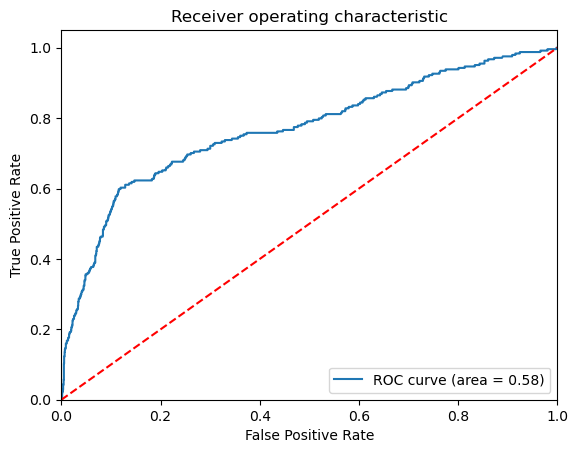

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Best classifiers from steps 5 and 6
best_classifier_step5 = max(pipelines, key=lambda x: x[1])[0]
best_classifier_step6 = max(pipelines_rf, key=lambda x: x[1])[0]

# Accuracy comparison
print(f"Best classifier from step 5: {best_classifier_step5}")
print(f"Best classifier from step 6: {best_classifier_step6}")

# Train the best classifier from step 6 on the whole training set
best_clf_rf = dict(classifiers)[best_classifier_step6]
best_clf_rf.fit(X_train_rf, y_train_rf)

# Evaluate the model on the test set
y_pred_rf = best_clf_rf.predict(X_test_rf)
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
print(f"Accuracy of the best classifier from step 6: {accuracy_rf}")

# Confusion Matrix
conf_mat_rf = confusion_matrix(y_test_rf, y_pred_rf)
print("Confusion Matrix:")
print(conf_mat_rf)

# Classification Report
class_rep_rf = classification_report(y_test_rf, y_pred_rf)
print("Classification Report:")
print(class_rep_rf)

# ROC Curve
logit_roc_auc = roc_auc_score(y_test_rf, best_clf_rf.predict(X_test_rf))
fpr, tpr, thresholds = roc_curve(y_test_rf, best_clf_rf.predict_proba(X_test_rf)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


If the number of false negatives is quite high, it suggests that the classifier is better at predicting rejections (class 0) than predicting clients who will sign up for the new banking product. To improve the classifier performance, we can try the following approaches:

1/ Balance the dataset: If the dataset is imbalanced (i.e., there are more samples of one class than the other), we can use techniques like oversampling the minority class, undersampling the majority class, or generating synthetic samples (e.g., using SMOTE) to balance the dataset.

2/Adjust the classifier's parameters: Tune the parameters of the classifier to achieve better performance. This can be done using techniques like grid search or random search.

3/Feature engineering: Create new features or transform existing ones to capture more information that may be helpful for classification.

4/ Ensemble methods: Combine multiple classifiers to improve the overall performance of the model. This can include techniques like bagging, boosting, or stacking.


5/ Use a different classifier: Experiment with other classifiers that may be better suited for this problem.

## 8. Prediction

In [22]:
df_p

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,y,last_contact
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,0,unknown,no,197
1,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,0,unknown,no,197
2,11,29,admin.,single,secondary,no,390,yes,no,unknown,1,-1,0,unknown,no,197
3,12,53,technician,married,secondary,no,6,yes,no,unknown,1,-1,0,unknown,no,197
4,17,57,blue-collar,married,primary,no,52,yes,no,unknown,1,-1,0,unknown,no,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,3,530,12,other,no,2
8996,45201,53,management,married,tertiary,no,583,no,no,cellular,1,184,4,success,yes,1
8997,45204,73,retired,married,secondary,no,2850,no,no,cellular,1,40,8,failure,yes,1
8998,45206,51,technician,married,tertiary,no,825,no,no,cellular,3,-1,0,unknown,yes,1


In [23]:
# Create dummy variables without drop
categorical_columns = df_p.select_dtypes("object").columns
df_p = pd.get_dummies(df_p, columns=categorical_columns, prefix=categorical_columns)

# Rename columns' name
df_p.columns = df_p.columns.str.replace("-", "_")
df_p

,Unnamed: 0,age,balance,campaign,pdays,previous,last_contact,job_admin.,job_blue_collar,job_entrepreneur,...,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,0,58,2143,1,-1,0,197,0,0,0,...,0,0,0,1,0,0,0,1,1,0
1,2,33,2,1,-1,0,197,0,0,1,...,1,0,0,1,0,0,0,1,1,0
2,11,29,390,1,-1,0,197,1,0,0,...,0,0,0,1,0,0,0,1,1,0
3,12,53,6,1,-1,0,197,0,0,0,...,0,0,0,1,0,0,0,1,1,0
4,17,57,52,1,-1,0,197,0,1,0,...,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,45199,34,1475,3,530,12,2,0,1,0,...,0,1,0,0,0,1,0,0,1,0
8996,45201,53,583,1,184,4,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
8997,45204,73,2850,1,40,8,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
8998,45206,51,825,3,-1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [24]:
#Make sure that the columns order and columns name are exactly similar to the
#ones included by the feature selection process at step 6
print(rf_selected_features)
print("")
print("")
print(df_p.columns)

Index(['job_blue_collar', 'job_retired', 'marital_married', 'marital_single',
       'education_secondary', 'housing_yes', 'loan_yes', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')


Index(['Unnamed: 0', 'age', 'balance', 'campaign', 'pdays', 'previous',
       'last_contact', 'job_admin.', 'job_blue_collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self_employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_no',
       'y_yes'],
      dtype='object')


In [25]:
#transform the new data using the robust scaler model you used in step 6
# Scale the selected features using RobustScaler

import joblib
scaler_rf = joblib.load('robust_scaler_rf.joblib')


In [26]:
X = df.drop(['y_yes'], axis=1)
y = df['y_yes']

In [27]:
X_scaled = scaler_rf.fit(X)

y_pred = y_pred_rf

In [28]:
#Make a prediction
'''
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

X_selected = X_scaled
y_prediction = y_pred
'''

'\nX_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)\n\nX_selected = X_scaled\ny_prediction = y_pred\n'

In [29]:
'''
#join X_test and y_test

test_data = pd.concat([X_test, y_test], axis=1)

print(y_prediction)
#append to test data
test_data['y_pred'] = y_prediction
'''

"\n#join X_test and y_test\n\ntest_data = pd.concat([X_test, y_test], axis=1)\n\nprint(y_prediction)\n#append to test data\ntest_data['y_pred'] = y_prediction\n"

In [30]:
'''
pred_prob = scaler_rf.predict_proba(X_test)
print(pred_prob)
'''

'\npred_prob = scaler_rf.predict_proba(X_test)\nprint(pred_prob)\n'

In [31]:
'''
#Append the second column (i.e., corresponds to "Attrition_Yes") of predicted probabilities to test set
#Note: First column corresponds to "Attrition_No"
test_data["pred_prob"] = scaler_rf.predict_proba(X_test)[:,1]
'''

'\n#Append the second column (i.e., corresponds to "Attrition_Yes") of predicted probabilities to test set\n#Note: First column corresponds to "Attrition_No"\ntest_data["pred_prob"] = scaler_rf.predict_proba(X_test)[:,1]\n'

In [32]:
'''
emp_df = pd.DataFrame(X_selected.describe())
emp_df

#Using mean values of X_selected
print(emp_df.loc['mean',:].values)
emp_df = [emp_df.loc['mean',:].values]

#predict class membership
y_pred_emp = scaler_rf.predict(emp_df)

#Predicted Probability
pred_prob_emp = scaler_rf.predict_proba(emp_df)

#define function to display class label
def display_classLabel(y_pred_):
    label =''
    if y_pred_ ==0:
        label ='"Not attrited"'
    else:
        label = '"Attrited"'
    print('Predicted client response is',y_pred_,', which means',label)

#display predicted class label
display_classLabel(y_pred_emp)

#define function to display predicted probability
def display_PredProb(y_pred_, pred_prob):
    prob_label = ''
    prob =0
    if y_pred_==0:
        prob_label ='", which mean the probability of client joining is"'
        prob = pred_prob[:,0]
    else:
        prob_label ='", which means, probability of client joining is"'
        prob = pred_prob[:,1]
    print('Predicted probability for the client is',prob, prob_label, prob)

#display predicted probability
display_PredProb(y_pred_emp, pred_prob_emp)
'''

'\nemp_df = pd.DataFrame(X_selected.describe())\nemp_df\n\n#Using mean values of X_selected\nprint(emp_df.loc[\'mean\',:].values)\nemp_df = [emp_df.loc[\'mean\',:].values]\n\n#predict class membership\ny_pred_emp = scaler_rf.predict(emp_df)\n\n#Predicted Probability\npred_prob_emp = scaler_rf.predict_proba(emp_df)\n\n#define function to display class label\ndef display_classLabel(y_pred_):\n    label =\'\'\n    if y_pred_ ==0:\n        label =\'"Not attrited"\'\n    else:\n        label = \'"Attrited"\'\n    print(\'Predicted client response is\',y_pred_,\', which means\',label)\n\n#display predicted class label\ndisplay_classLabel(y_pred_emp)\n\n#define function to display predicted probability\ndef display_PredProb(y_pred_, pred_prob):\n    prob_label = \'\'\n    prob =0\n    if y_pred_==0:\n        prob_label =\'", which mean the probability of client joining is"\'\n        prob = pred_prob[:,0]\n    else:\n        prob_label =\'", which means, probability of client joining is"\'\n 

# B. Competition

## 1. Dataset

In [33]:
import numpy as np
import pandas as pd
df = pd.read_csv('bank-sampled-9K.csv')
df

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
2,11,29,admin.,single,secondary,no,390,yes,no,unknown,5,may,137,1,-1,0,unknown,no
3,12,53,technician,married,secondary,no,6,yes,no,unknown,5,may,517,1,-1,0,unknown,no
4,17,57,blue-collar,married,primary,no,52,yes,no,unknown,5,may,38,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
8996,45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
8997,45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
8998,45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes


In [34]:
df.isnull().sum()

Unnamed: 0    0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

In [35]:
# Tranform categorical data into dummies
job = pd.get_dummies(df['job'])
df=df.join(job)
df.rename(columns={'blue-collar':'job_blue_collar','entrepreneur':'job_entrepreneur','housemaid':'job_housemaid',
                   'management':'job_management','retired':'job_retired',
                   'self-employed':'job_self_employed','services':'job_services',
                   'student':'job_student', 'technician':'job_technician',
                   'unemployed':'job_unemployed','unknown':'job_unknown'},inplace = True)

marital = pd.get_dummies(df['marital'])
df=df.join(marital)
df.rename(columns={'divorced':'marital_divorced','married':'marital_divorced',
                   'single':'marital_single'},inplace = True)

education = pd.get_dummies(df['education'])
df=df.join(education)
df.rename(columns={'primary':'education_primary','secondary':'education_secondary',
                   'tertiary':'education_tertiary','unknown':'unknown_education'},inplace = True)

default = pd.get_dummies(df['default'])
df=df.join(default)
df.rename(columns={'no':'default_no','yes':'default_yes'},inplace = True)


housing = pd.get_dummies(df['housing'])
df=df.join(housing)
df.rename(columns={'no':'housing_no','yes':'housing_yes'},inplace = True)


loan = pd.get_dummies(df['loan'])
df=df.join(loan)
df.rename(columns={'no':'loan_no','yes':'loan_yes'},inplace = True)


contact = pd.get_dummies(df['contact'])
df=df.join(contact)
df.rename(columns={'cellular':'contact_cellular','telephone':'contact_cellular',
                   'unknown':'contact_unknown'},inplace = True)


month = pd.get_dummies(df['month'])
df=df.join(month)
df.rename(columns={'aug':'month_aug','dec':'month_dec','feb':'month_feb',
                   'jan':'month_jan','jul':'month_jul', 'jun':'month_jun','mar':'month_mar',
                  'may':'month_may','nov':'month_nov','oct':'month_oct','sep':'month_sep','apr':'month_apr'},inplace = True)

poutcome = pd.get_dummies(df['poutcome'])
df=df.join(poutcome)
df.rename(columns={'failure':'poutcome_failure','other':'poutcome_other',
                   'success':'poutcome_success','unknown':'poutcome_unknown'},inplace = True)

y = pd.get_dummies(df['y'])
df=df.join(y)
df.rename(columns={'no':'y_no','yes':'y_yes'},inplace = True)
df

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,...,1,0,0,0,0,0,0,1,1,0
1,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,...,1,0,0,0,0,0,0,1,1,0
2,11,29,admin.,single,secondary,no,390,yes,no,unknown,...,1,0,0,0,0,0,0,1,1,0
3,12,53,technician,married,secondary,no,6,yes,no,unknown,...,1,0,0,0,0,0,0,1,1,0
4,17,57,blue-collar,married,primary,no,52,yes,no,unknown,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,...,0,1,0,0,0,1,0,0,1,0
8996,45201,53,management,married,tertiary,no,583,no,no,cellular,...,0,1,0,0,0,0,1,0,0,1
8997,45204,73,retired,married,secondary,no,2850,no,no,cellular,...,0,1,0,0,1,0,0,0,0,1
8998,45206,51,technician,married,tertiary,no,825,no,no,cellular,...,0,1,0,0,0,0,0,1,0,1


In [36]:
df = df.drop(columns=['job','marital','education','default','housing','loan','contact','month','poutcome','y'])
df

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous,admin.,job_blue_collar,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,0,58,2143,5,261,1,-1,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,2,33,2,5,76,1,-1,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,11,29,390,5,137,1,-1,0,1,0,...,1,0,0,0,0,0,0,1,1,0
3,12,53,6,5,517,1,-1,0,0,0,...,1,0,0,0,0,0,0,1,1,0
4,17,57,52,5,38,1,-1,0,0,1,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,45199,34,1475,16,1166,3,530,12,0,1,...,0,1,0,0,0,1,0,0,1,0
8996,45201,53,583,17,226,1,184,4,0,0,...,0,1,0,0,0,0,1,0,0,1
8997,45204,73,2850,17,300,1,40,8,0,0,...,0,1,0,0,1,0,0,0,0,1
8998,45206,51,825,17,977,3,-1,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [37]:
df.isnull().sum()

Unnamed: 0             0
age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
admin.                 0
job_blue_collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self_employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_divorced       0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
unknown_education      0
default_no             0
default_yes            0
housing_no             0
housing_yes            0
loan_no                0
loan_yes               0
contact_cellular       0
contact_cellular       0
contact_unknown        0
month_apr              0
month_aug              0
month_dec              0
month_feb              0


In [38]:
data = df.loc[:, ~df.columns.isin(['y_no','y_yes'])] #Name features columns as data
target = df['y_yes'] #Name response column as target

## 2. Traing/Test Split

### Training/Test Split with 10-fold CV

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=5000)
scores = cross_val_score(logreg,data,target)
print("Cross-validation scores: {}".format(scores))
print("Average cv score: {:.2f}".format(scores.mean()))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross-validation scores: [0.89277778 0.89777778 0.89166667 0.86833333 0.69611111]
Average cv score: 0.85
Accuracy: 0.85 (+/- 0.15)


In [40]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 10)

scores = cross_val_score(logreg, data, target, cv=kfold)
print("Cross-validation scores: {}".format(scores))
print("Average cv score: {:.2f}".format(scores.mean()))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross-validation scores: [0.96555556 0.96555556 0.95888889 0.95333333 0.95       0.93555556
 0.89333333 0.88555556 0.85       0.55888889]
Average cv score: 0.89
Accuracy: 0.89 (+/- 0.23)


### Feature Selection

#### Method 1: using variance treshold

In [41]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=.25)
vt.fit(data)

pd.DataFrame({'variance': vt.variances_, 'select_feature' : vt.get_support()}, index=data.columns).T

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous,admin.,job_blue_collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
variance,170963208.930067,111.537061,11313154.58178,69.188953,62745.171048,9.065243,9887.313914,12.242442,0.104585,0.166736,...,0.101518,0.0099,0.212794,0.080988,0.017569,0.012723,0.098506,0.037684,0.031392,0.149158
select_feature,True,True,True,True,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
X_1 = data.iloc[:,vt.get_support()]
print(X_1.shape)
X_1.head()

(9000, 8)


,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
0,0,58,2143,5,261,1,-1,0
1,2,33,2,5,76,1,-1,0
2,11,29,390,5,137,1,-1,0
3,12,53,6,5,517,1,-1,0
4,17,57,52,5,38,1,-1,0


#### Method 2: Use SelectFromModel and LogisticRegression

In [43]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

method2 = SelectFromModel(estimator=LogisticRegression(max_iter=5000)).fit(data,target)
method2.estimator_.coef_

array([[ 7.38079577e-05, -3.45942628e-02,  7.76072734e-06,
        -1.06533681e-02,  4.53369674e-03, -1.38548225e-01,
        -1.77896558e-03,  2.79456815e-03, -5.91076693e-02,
        -3.30296563e-01, -6.02855023e-02, -4.16717359e-02,
        -1.50119547e-01,  3.45090142e-01, -5.65257633e-02,
        -1.45473865e-01, -3.26421176e-02, -1.27420115e-01,
        -9.22266601e-03,  1.44824656e-02,  5.78961578e-02,
        -2.10051319e-01, -5.01037776e-01, -1.22849498e-01,
        -4.34024323e-01, -1.11796885e-01,  1.54777679e-02,
        -6.17236751e-01, -3.59561857e-02,  3.03379308e-01,
        -9.56572245e-01, -2.95558754e-01, -3.57634183e-01,
        -4.03878954e-01,  2.63509358e-02, -2.75664919e-01,
         1.08564746e-02, -1.04283595e-02,  2.63316735e-02,
        -1.31097299e-01, -4.43781724e-02, -1.08792094e-01,
         2.61838654e-03,  1.34411522e-01, -6.07025385e-01,
        -9.71672658e-02,  1.11184236e-01,  6.02933459e-02,
        -2.64466626e-01, -7.66752298e-02,  5.22958402e-0

In [44]:
#cutoff abs(coefficient) value for feature significance
method2.threshold_

0.1795073601215278

In [45]:
#False = insignificant feature; True = significant fearture
method2.get_support()

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True, False,  True,  True,  True,  True,  True, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False,  True,  True])

In [46]:
#Gives the subset of features to use in analysis
X_2 = method2.transform(data)
X_2.shape

(9000, 16)

#### Method 3: Use Generalized Linear Model (Binomial) from statsmodels

In [47]:
import statsmodels.api as sm
logit_model = sm.GLM(target,data,family=sm.families.Binomial())
result=logit_model.fit(fit_intercept=True)
print(result.summary2())

                 Results: Generalized linear model
Model:                GLM               AIC:             3934.9328  
Link Function:        Logit             BIC:             -77697.2668
Dependent Variable:   y_yes             Log-Likelihood:  -1923.5    
Date:                 2023-04-05 16:41  LL-Null:         -3203.4    
No. Observations:     9000              Deviance:        3846.9     
Df Model:             43                Pearson chi2:    2.83e+04   
Df Residuals:         8956              Scale:           1.0000     
Method:               IRLS                                          
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Unnamed: 0           0.0001   0.0000  17.9356 0.0000  0.0001  0.0001
age                 -0.0007   0.0052  -0.1315 0.8953 -0.0109  0.0095
balance              0.0000   0.0000   1.0502 0.2936

In [48]:
result.params >= 0.01
X_3 = data.loc[:, abs(result.params) >=0.01]
X_3.head()

,day,campaign,admin.,job_blue_collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self_employed,job_services,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,5,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,5,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,5,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,5,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


#### Method 4: Use Recursive Feature Elimination (RFE) and Logistic Regression

In [49]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe = RFE(estimator=LogisticRegression(max_iter=5000), step=1)
rfe_result = rfe.fit(data,target)
print(rfe_result.support_)
print(rfe_result.ranking_)

X_4 = data.loc[:, rfe_result.support_]
X_4.head()
print(X_4.shape)

[False False False False False False False False False False  True  True
 False  True False False  True False False False False False False  True
 False False False  True False  True  True  True  True  True False  True
 False  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True]
[26 24 27 21 22 13 25 23  8 10  1  1 15  1 14 19  1 20  9  5 18  3 17  1
 16  6  7  1 11  1  1  1  1  1  2  1 12  1  1  1  1  1  4  1  1  1  1  1
  1  1  1  1]
(9000, 26)


#### Performance of Feature Selection Method 1

In [50]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [51]:
from sklearn.linear_model import LogisticRegression

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, target, test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train1, y_train1)
y_pred_1 = logreg.predict(X_test1)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test1, y_test1)))

Accuracy of logistic regression classifier on test set: 0.89


#### Performance of Feature Selection Method 2

In [52]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, target,test_size=0.3, random_state=0)
logreg2 = LogisticRegression(max_iter=5000)
logreg2.fit(X_train2, y_train2)
y_pred_2 = logreg2.predict(X_test2)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg2.score(X_test2, y_test2)))

Accuracy of logistic regression classifier on test set: 0.90


#### Performance of Feature Selection Method 3

In [53]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_3, target, test_size=0.3, random_state=0)
logreg3 = LogisticRegression(max_iter=5000)
logreg3.fit(X_train3, y_train3)
y_pred_3 = logreg3.predict(X_test3)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg3.score(X_test3, y_test3)))

Accuracy of logistic regression classifier on test set: 0.89


#### Performance of Feature Selection Method 4

In [54]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_4, target, test_size=0.3, random_state=0)
logreg4 = LogisticRegression(max_iter=5000)
logreg4.fit(X_train4, y_train4)
y_pred_4 = logreg4.predict(X_test4)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg4.score(X_test4, y_test4))) 

Accuracy of logistic regression classifier on test set: 0.90


#### Performance of Feature Selection Method 5

In [55]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(data, target,test_size=0.3,random_state=0)
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_f, y_train_f),
y_pred_f = logreg.predict(X_test_f)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_f, y_test_f)))

Accuracy of logistic regression classifier on test set: 0.90


### Selecting the best feature selection

In [56]:
X_selected = X_2
y_prediction = y_pred_2

## 3. Model Creation

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss

In [58]:
#Names of the various classification approaches for easy presentation of the results
names = ["Logististic Regression", "Nearest Neighbors", "Linear SVM", "RBF SVM",          
         "Decision Tree", "Naive Bayes"]

scores = []

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel='linear', C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    GaussianNB()
]

for classifier in classifiers:
    pipeline = Pipeline(steps=[
        ('classifier', classifier)
    ])
    pipeline.fit(X_train2, y_train2)
    print(classifier)
    score = pipeline.score(X_test2, y_test2)
    scores.append(score)
    print("model score:", score)
    print("\n-----------------------------------------")



LogisticRegression()
model score: 0.8951851851851852

-----------------------------------------
KNeighborsClassifier(n_neighbors=3)
model score: 0.8685185185185185

-----------------------------------------
SVC(C=0.025, kernel='linear')
model score: 0.8948148148148148

-----------------------------------------
SVC(C=1, gamma=2)
model score: 0.8885185185185185

-----------------------------------------
DecisionTreeClassifier(max_depth=5)
model score: 0.8959259259259259

-----------------------------------------
GaussianNB()
model score: 0.8637037037037038

-----------------------------------------


In [59]:
scores_df = pd.DataFrame(zip(names, scores), columns=['Classifier', 'Accuracy'])
print(scores_df)

               Classifier  Accuracy
0  Logististic Regression  0.895185
1       Nearest Neighbors  0.868519
2              Linear SVM  0.894815
3                 RBF SVM  0.888519
4           Decision Tree  0.895926
5             Naive Bayes  0.863704


In [60]:
!pip install pydot

In [61]:
#Because Logististic Regression has the highest score, therefore, it is chosen to be the classification for this data
from sklearn.linear_model import LogisticRegression
logit_reg = LogisticRegression()
logit_reg.fit(X_train2, y_train2)

LogisticRegression()

## 4. Evaluation

In [62]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test2, y_pred_2)
print(conf_matrix)

[[2362   25]
 [ 258   55]]


<Axes: xlabel='Predicted', ylabel='Actual'>

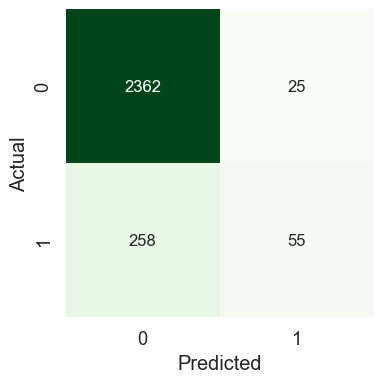

In [63]:
#Generate seaborn heatmap for the confusion matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(conf_matrix, columns=np.unique(y_test2), index = np.unique(y_test2))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.set(font_scale=1.2)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False,
           square=True, fmt="d", cmap="Greens")

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_prediction))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2387
           1       0.69      0.18      0.28       313

    accuracy                           0.90      2700
   macro avg       0.79      0.58      0.61      2700
weighted avg       0.88      0.90      0.87      2700



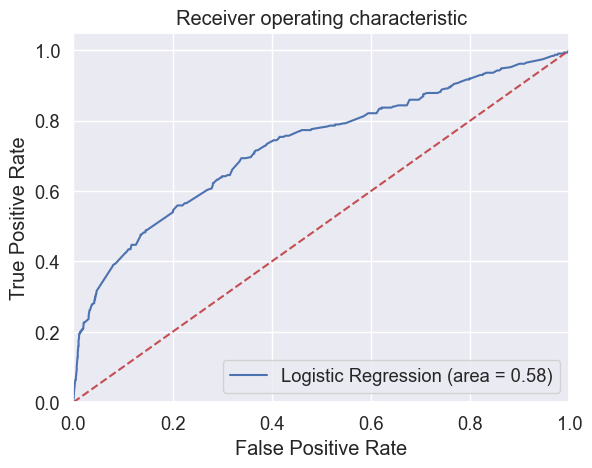

In [65]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test2, logit_reg.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test2, logit_reg.predict_proba(X_test2)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# C. Member Contribution

The peer evaluation matrix with scores from 1 to 4.

|        Evaluator / Evaluatee     | Member 1 (Nhi Cao) | Member 2 (Amrit Sian) | Member 3 (Huy Thuy Dung Nguyen) |
|----------------------------------|--------------------|-----------------------|---------------------------------|
|         Member 1 (Nhi Cao)       |          /         |            4          |                4                |
|----------------------------------|--------------------|-----------------------|---------------------------------|
|        Member 2 (Amrit Sian)     |          4         |          /            |                 4               |
|----------------------------------|--------------------|-----------------------|---------------------------------|
|  Member 3 (Huy Thuy Dung Nguyen) |          4         |          4            |                  /              |